<a href="https://colab.research.google.com/github/Akshitha181203/Linear-Regressions-on-Student-Performance/blob/main/2021csb1122_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

In [ ]:
# Load the dataset
file_path = '/content/sample_data/Student_Performance.csv'  # Update the path if necessary
data = pd.read_csv(file_path)


In [ ]:
# Preprocess data
#Convert categorical variable to binary
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Separate features and target variable
X = data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']].values
y = data['Performance Index'].values


In [ ]:
# Split the data into training and testing sets (70%-30% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Polynomial Features to capture nonlinear relationships
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

# Apply Min-Max Scaling to normalize the data
X_min = X_train.min(axis=0)
X_max = X_train.max(axis=0)
X_train = (X_train - X_min) / (X_max - X_min)
X_test = (X_test - X_min) / (X_max - X_min)

In [ ]:
# Initialize weights and bias
def initialize_weights(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

In [ ]:
# Define prediction function (linear regression)
def predict(X, weights, bias):
    return np.dot(X, weights) + bias

# Define mean squared error function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [ ]:
# Define function for gradient descent
def gradient_descent(X, y, weights, bias, learning_rate, epochs):
    n_samples = X.shape[0]
    for epoch in range(epochs):
        # Predict values
        y_pred = predict(X, weights, bias)
        # Compute gradients
        weight_gradient = -(2/n_samples) * np.dot(X.T, (y - y_pred))
        bias_gradient = -(2/n_samples) * np.sum(y - y_pred)
        # Update weights and bias
        weights -= learning_rate * weight_gradient
        bias -= learning_rate * bias_gradient
        # Print loss every 100 epochs
        if epoch % 100 == 0:
            loss = mean_squared_error(y, y_pred)
            print(f"Epoch {epoch}: Loss = {loss}")
    return weights, bias

In [ ]:
# Define function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    error = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - error
    return accuracy

In [ ]:
# Train the model
weights, bias = initialize_weights(X_train.shape[1])
learning_rate = 0.001
epochs = 10000

weights, bias = gradient_descent(X_train, y_train, weights, bias, learning_rate, epochs)

Epoch 0: Loss = 3437.694285714286
Epoch 100: Loss = 761.6280574230706
Epoch 200: Loss = 334.4467705781895
Epoch 300: Loss = 243.04980477846314
Epoch 400: Loss = 205.8053016466537
Epoch 500: Loss = 180.40575130592165
Epoch 600: Loss = 159.85114415321115
Epoch 700: Loss = 142.50080337816613
Epoch 800: Loss = 127.64006217442405
Epoch 900: Loss = 114.79627699713096
Epoch 1000: Loss = 103.61278704465819
Epoch 1100: Loss = 93.81109731885445
Epoch 1200: Loss = 85.17082467978341
Epoch 1300: Loss = 77.5158560971686
Epoch 1400: Loss = 70.70411202365646
Epoch 1500: Loss = 64.61985160236111
Epoch 1600: Loss = 59.16785637217126
Epoch 1700: Loss = 54.26901703710541
Epoch 1800: Loss = 49.85697162136221
Epoch 1900: Loss = 45.87553308456445
Epoch 2000: Loss = 42.27671094241018
Epoch 2100: Loss = 39.019180884724335
Epoch 2200: Loss = 36.06709320829372
Epoch 2300: Loss = 33.3891383229408
Epoch 2400: Loss = 30.957808047959787
Epoch 2500: Loss = 28.748806677862845
Epoch 2600: Loss = 26.74057718930896
Epoch

In [ ]:
# Make predictions and evaluate on test set
y_train_pred = predict(X_train, weights, bias)
y_test_pred = predict(X_test, weights, bias)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
train_accuracy = calculate_accuracy(y_train, y_train_pred)
test_accuracy = calculate_accuracy(y_test, y_test_pred)

In [ ]:
# Categorize predictions into classes: Low, Medium, High for classification
def categorize_performance(y):
    return np.where(y < 40, "Low", np.where(y < 70, "Medium", "High"))

y_train_class = categorize_performance(y_train)
y_test_class = categorize_performance(y_test)
y_train_pred_class = categorize_performance(y_train_pred)
y_test_pred_class = categorize_performance(y_test_pred)

# Calculate metrics
train_classification_accuracy = accuracy_score(y_train_class, y_train_pred_class)
test_classification_accuracy = accuracy_score(y_test_class, y_test_pred_class)
train_f1_score = f1_score(y_train_class, y_train_pred_class, average="weighted")
test_f1_score = f1_score(y_test_class, y_test_pred_class, average="weighted")

In [ ]:
# Display results
print("\nFinal Weights:", weights)
print("Final Bias:", bias)
print("Training Error:", train_error)
print("Testing Error:", test_error)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test_class, y_test_pred_class))
print("\nClassification Report (Test Set):\n", classification_report(y_test_class, y_test_pred_class))


Final Weights: [ 8.10904586 24.26203405  0.26390342 -0.66487802  1.40059022  5.49323052
 10.81005786 -0.05119786  2.78998828  0.43258917 22.67827552  4.25416602
 10.4535213   5.42746663  0.26390342 -2.18731148 -2.48999919 -1.48881329
 -1.64714094 -1.14875088]
Final Bias: 17.058720936609504
Training Error: 5.951105838150673
Testing Error: 5.839430231676395
Training Accuracy: 95.64513291505341
Testing Accuracy: 95.47155853916215

Confusion Matrix (Test Set):
 [[ 705    0   65]
 [   0  698   35]
 [  26   65 1406]]

Classification Report (Test Set):
               precision    recall  f1-score   support

        High       0.96      0.92      0.94       770
         Low       0.91      0.95      0.93       733
      Medium       0.93      0.94      0.94      1497

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



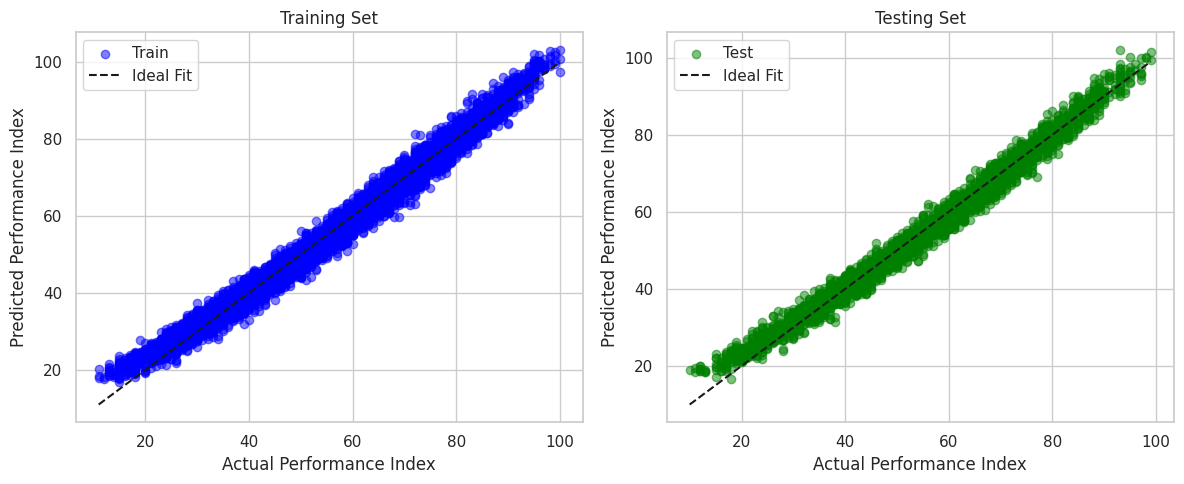

In [ ]:
# Plot results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color="blue", alpha=0.5, label="Train")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', label="Ideal Fit")
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Training Set")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color="green", alpha=0.5, label="Test")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label="Ideal Fit")
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Testing Set")
plt.legend()

plt.tight_layout()
plt.show()